In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
import seaborn as sn

In [16]:
(x_train,y_train) , (x_test,y_test) =keras.datasets.mnist.load_data()  # loads data set of images of digits 
# x_train is image , y_train is actual value 

In [17]:
len(x_train) # no of training digits sample 

60000

In [18]:
len(x_test) # no of testing digits sample 

10000

In [19]:
x_train[0].shape  # shape of every image is 28*28 pixels 

(28, 28)

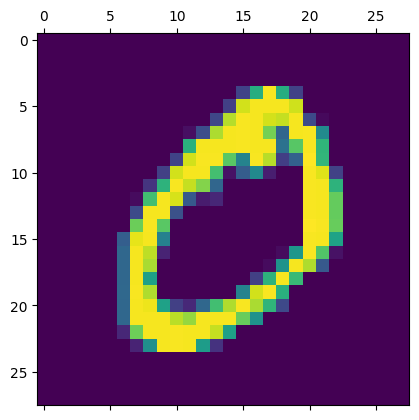

In [20]:
plt.matshow(x_train[1])

In [21]:
y_train[1]

0

Function to plot history

In [22]:
# Extracting the training metrics from the history object
def plot(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Plotting the training metrics
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, accuracy)
    plt.title('Model Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, loss)
    plt.title('Model LOSS')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Flattening the matrix for better results 

In [23]:
x_train =x_train/255 # feature scaling 
x_test=x_test/255  # feature scaling
x_train_flattened=x_train.reshape(len(x_train),28*28) # flattening the data matrix
x_test_flattened=x_test.reshape(len(x_test),28*28)  # flattening the test matrix
x_train_flattened.shape


(60000, 784)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4603 - accuracy: 0.8791
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1807 - accuracy: 0.9468
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1269 - accuracy: 0.9617
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0953 - accuracy: 0.9719
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9881
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


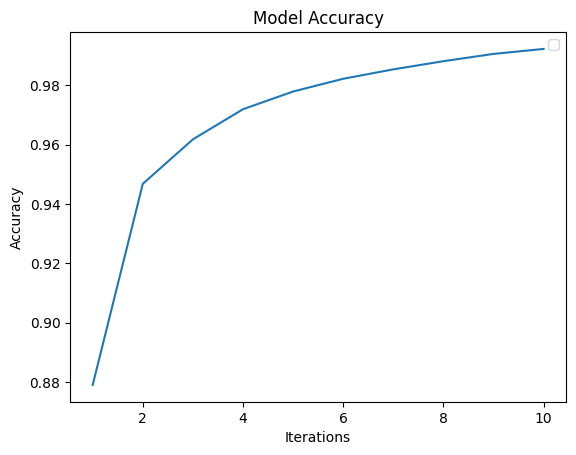

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


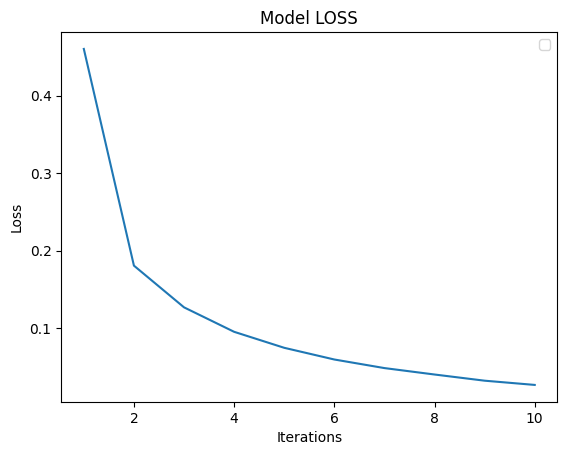

In [24]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callbacks=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)  

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(x_train_flattened, y_train, epochs=10,callbacks=[tb_callbacks])
plot(history)

313/313 [==============================] - 1s 2ms/step


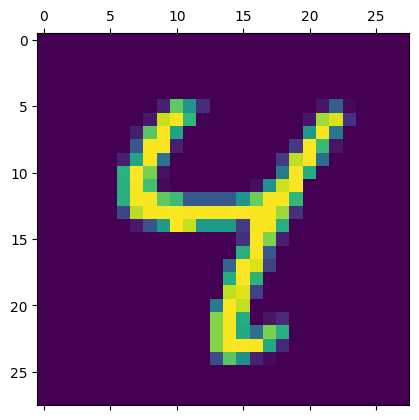

In [25]:
y_predicted=model.predict(x_test_flattened)
y_predicted=[np.argmax(i) for i in y_predicted]

plt.matshow(x_test[6])

Predicted Value

In [26]:
y_predicted[6]

4

Text(95.72222222222221, 0.5, 'Truth')

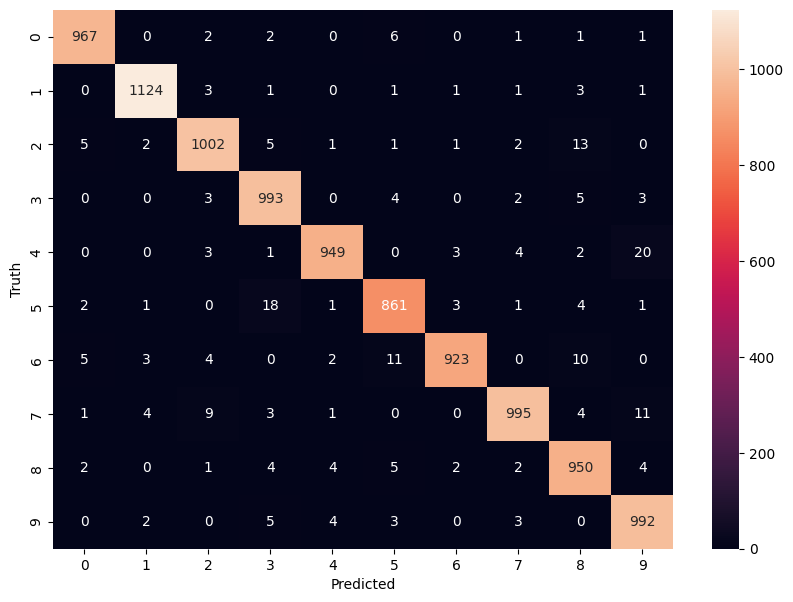

In [27]:
confusionMat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(confusionMat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
loss,accuracy=model.evaluate(x_test_flattened,y_test)
print("Accuracy : "+str(int(accuracy*100))+"%")
print("Loss : "+str(int(loss*100))+"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9756
Accuracy : 97%
Loss : 8%
